In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model, datasets
import matplotlib.pyplot as plt
df = pd.DataFrame({ 'A':1,
                    'B':pd.Timestamp('20180924', freq=6),
                    'C':np.array([3] * 4),
                    'D':pd.Categorical(['test', 'train', 'test', 'train']),
                    'F':'foo'
    
})
df

,A,B,C,D,F
0,1,2018-09-24,3,test,foo
1,1,2018-09-24,3,train,foo
2,1,2018-09-24,3,test,foo
3,1,2018-09-24,3,train,foo


In [45]:
df.dtypes

A             int64
B    datetime64[ns]
C             int32
D          category
F            object
dtype: object

In [5]:
df.index

RangeIndex(start=0, stop=4, step=1)

In [6]:
df.columns

Index(['A', 'B', 'C', 'D', 'F'], dtype='object')

In [7]:
#Transposing the dataset
df.T

,0,1,2,3
A,1,1,1,1
B,2018-09-24 00:00:00,2018-09-24 00:00:00,2018-09-24 00:00:00,2018-09-24 00:00:00
C,3,3,3,3
D,test,train,test,train
F,foo,foo,foo,foo


In [8]:
df.sort_values(by='D')

,A,B,C,D,F
0,1,2018-09-24,3,test,foo
2,1,2018-09-24,3,test,foo
1,1,2018-09-24,3,train,foo
3,1,2018-09-24,3,train,foo


In [2]:
df2 = pd.read_csv(r"C:\Users\Kamal Dev Sharma\testdirec\sentdex practice\NSE-MARUTI.csv") #we use 'r' for raw string
df2.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-08-17,9243.00,9286.50,9130.00,9149.95,9152.10,477538.0,44002.98
1,2018-08-16,9124.00,9235.95,9085.00,9202.20,9200.55,465479.0,42757.42
2,2018-08-14,9079.00,9158.80,9046.25,9135.00,9132.60,344056.0,31355.62
3,2018-08-13,9119.45,9185.00,9012.20,9107.00,9080.85,348201.0,31750.75
4,2018-08-10,9150.00,9210.00,9105.00,9119.90,9148.25,427827.0,39190.31


In [10]:
df2.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity    float64
Turnover (Lacs)         float64
dtype: object

In [3]:
df2.Date = pd.to_datetime(df2.Date, format='%Y/%m/%d')
df2.dtypes

Date                    datetime64[ns]
Open                           float64
High                           float64
Low                            float64
Last                           float64
Close                          float64
Total Trade Quantity           float64
Turnover (Lacs)                float64
dtype: object

In [12]:
df2.reset_index(level=0, inplace=True)
df2.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,0,2018-08-17,9243.00,9286.50,9130.00,9149.95,9152.10,477538.0,44002.98
1,1,2018-08-16,9124.00,9235.95,9085.00,9202.20,9200.55,465479.0,42757.42
2,2,2018-08-14,9079.00,9158.80,9046.25,9135.00,9132.60,344056.0,31355.62
3,3,2018-08-13,9119.45,9185.00,9012.20,9107.00,9080.85,348201.0,31750.75
4,4,2018-08-10,9150.00,9210.00,9105.00,9119.90,9148.25,427827.0,39190.31


In [13]:
df2[df2['Close']==9152.10]

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,0,2018-08-17,9243.0,9286.5,9130.0,9149.95,9152.1,477538.0,44002.98


In [14]:
df2[df2['Date']=='2018-08-17']

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,0,2018-08-17,9243.0,9286.5,9130.0,9149.95,9152.1,477538.0,44002.98


In [15]:
df2[df2['Date']=='20180817']

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,0,2018-08-17,9243.0,9286.5,9130.0,9149.95,9152.1,477538.0,44002.98


In [32]:
df2.loc[:, ['Date', 'Open']].head()

,Date,Open
0,2018-08-17,9243.00
1,2018-08-16,9124.00
2,2018-08-14,9079.00
3,2018-08-13,9119.45
4,2018-08-10,9150.00


In [65]:
t1 = pd.to_datetime('2003-01-01')
t2 = pd.to_datetime('2003-07-09')
print(t2-t1)

189 days 00:00:00


In [53]:
df2.dtypes

index                            int64
Date                    datetime64[ns]
Open                           float64
High                           float64
Low                            float64
Last                           float64
Close                          float64
Total Trade Quantity           float64
Turnover (Lacs)                float64
dtype: object

In [68]:
df2['Turnover (Lacs)'][(df2['Date'] > t1)].head()

0    44002.98
1    42757.42
2    31355.62
3    31750.75
4    39190.31
Name: Turnover (Lacs), dtype: float64

In [72]:
df2.loc[(df2['Date'] > t1), ['Open', 'Close']].head()

,Open,Close
0,9243.00,9152.10
1,9124.00,9200.55
2,9079.00,9132.60
3,9119.45,9080.85
4,9150.00,9148.25


In [79]:
df2.iloc[0,2]

9243.0

In [82]:
df2.iloc[0:3, 2:5]

,Open,High,Low
0,9243.0,9286.50,9130.00
1,9124.0,9235.95,9085.00
2,9079.0,9158.80,9046.25


In [84]:
df2.iloc[[0, 2, 4], [2, 3]]

,Open,High
0,9243.0,9286.5
2,9079.0,9158.8
4,9150.0,9210.0


In [86]:
df2.iloc[2, 3]

9158.7999999999993

In [88]:
df2[df2 > 0]

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,NaN,2018-08-17,9243.00,9286.50,9130.00,9149.95,9152.10,477538.0,44002.98
1,1.0,2018-08-16,9124.00,9235.95,9085.00,9202.20,9200.55,465479.0,42757.42
2,2.0,2018-08-14,9079.00,9158.80,9046.25,9135.00,9132.60,344056.0,31355.62
3,3.0,2018-08-13,9119.45,9185.00,9012.20,9107.00,9080.85,348201.0,31750.75
4,4.0,2018-08-10,9150.00,9210.00,9105.00,9119.90,9148.25,427827.0,39190.31
5,5.0,2018-08-09,9239.00,9239.00,9060.00,9146.00,9146.05,651728.0,59496.38
6,6.0,2018-08-08,9449.00,9449.00,9183.05,9210.00,9207.40,638498.0,59339.83
7,7.0,2018-08-07,9316.00,9420.00,9271.00,9409.00,9411.50,381993.0,35727.93
8,8.0,2018-08-06,9247.50,9300.00,9200.00,9287.00,9286.40,237693.0,22036.30
9,9.0,2018-08-03,9150.00,9230.00,9150.00,9195.00,9187.00,470958.0,43284.51


In [5]:
df2.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-08-17,9243.00,9286.50,9130.00,9149.95,9152.10,477538.0,44002.98
1,2018-08-16,9124.00,9235.95,9085.00,9202.20,9200.55,465479.0,42757.42
2,2018-08-14,9079.00,9158.80,9046.25,9135.00,9132.60,344056.0,31355.62
3,2018-08-13,9119.45,9185.00,9012.20,9107.00,9080.85,348201.0,31750.75
4,2018-08-10,9150.00,9210.00,9105.00,9119.90,9148.25,427827.0,39190.31


In [10]:
series1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('2018-08-01', periods=6, freq='M'))
series1

2018-08-31    1
2018-09-30    2
2018-10-31    3
2018-11-30    4
2018-12-31    5
2019-01-31    6
Freq: M, dtype: int64

In [11]:
df2.at[3, 'Open'] = 0
df2.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-08-17,9243.0,9286.50,9130.00,9149.95,9152.10,477538.0,44002.98
1,2018-08-16,9124.0,9235.95,9085.00,9202.20,9200.55,465479.0,42757.42
2,2018-08-14,9079.0,9158.80,9046.25,9135.00,9132.60,344056.0,31355.62
3,2018-08-13,0.0,9185.00,9012.20,9107.00,9080.85,348201.0,31750.75
4,2018-08-10,9150.0,9210.00,9105.00,9119.90,9148.25,427827.0,39190.31


In [14]:
df2.at[df2.Date=='2018-08-14','Open'] = 0
df2.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-08-17,9243.0,9286.50,9130.00,9149.95,9152.10,477538.0,44002.98
1,2018-08-16,9124.0,9235.95,9085.00,9202.20,9200.55,465479.0,42757.42
2,2018-08-14,0.0,9158.80,9046.25,9135.00,9132.60,344056.0,31355.62
3,2018-08-13,0.0,9185.00,9012.20,9107.00,9080.85,348201.0,31750.75
4,2018-08-10,9150.0,9210.00,9105.00,9119.90,9148.25,427827.0,39190.31


In [19]:
df2.iat[2,4] = 0
df2.iat[3,4] = 0
df2.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-08-17,9243.0,9286.50,9130.00,9149.95,9152.10,477538.0,44002.98
1,2018-08-16,9124.0,9235.95,9085.00,9202.20,9200.55,465479.0,42757.42
2,2018-08-14,0.0,9158.80,9046.25,0.00,9132.60,344056.0,31355.62
3,2018-08-13,0.0,9185.00,9012.20,0.00,9080.85,348201.0,31750.75
4,2018-08-10,9150.0,9210.00,9105.00,9119.90,9148.25,427827.0,39190.31


In [3]:
df2.mean().head()

Open     2238.304864
High     2263.911071
Low      2211.198724
Last     2237.051621
Close    2237.169710
dtype: float64

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(df2.High, df2.Date)

In [5]:
df2.mean(1).head()

0    81071.790000
1    79154.874286
2    60137.610000
3    60779.464286
4    73250.065714
dtype: float64

In [4]:
df3 = df2.copy()
df3.drop(labels=df2.columns[1:], axis = 1, inplace = True)

In [5]:
import numpy as np
df3['Vehicles Sold (Thousands)'] = pd.Series((10 * np.random.random_sample(len(df3['Date']))))
df3['Vehicles Sold (Thousands)'] = round(df3['Vehicles Sold (Thousands)'],3)
df3.head()
df3.head()

,Date,Vehicles Sold (Thousands)
0,2018-08-17,9.139
1,2018-08-16,4.378
2,2018-08-14,8.805
3,2018-08-13,4.111
4,2018-08-10,0.996


In [6]:
df3['Vehicles Sold (Thousands)'].describe()

count    3762.000000
mean        4.947931
std         2.882000
min         0.006000
25%         2.464000
50%         4.856500
75%         7.400500
max         9.998000
Name: Vehicles Sold (Thousands), dtype: float64

In [7]:
pd.merge(df2, df3, on='Date').head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),Vehicles Sold (Thousands)
0,2018-08-17,9243.00,9286.50,9130.00,9149.95,9152.10,477538.0,44002.98,9.139
1,2018-08-16,9124.00,9235.95,9085.00,9202.20,9200.55,465479.0,42757.42,4.378
2,2018-08-14,9079.00,9158.80,9046.25,9135.00,9132.60,344056.0,31355.62,8.805
3,2018-08-13,9119.45,9185.00,9012.20,9107.00,9080.85,348201.0,31750.75,4.111
4,2018-08-10,9150.00,9210.00,9105.00,9119.90,9148.25,427827.0,39190.31,0.996


In [12]:
df2.groupby('Close').sum().head()

,Open,High,Low,Last,Total Trade Quantity,Turnover (Lacs)
Close,,,,,,
164.30,164.9,170.40,155.00,164.0,35164283.0,58355.28
164.90,169.0,169.40,163.05,164.0,3315845.0,5526.65
167.00,167.0,168.70,164.50,167.0,10464179.0,17448.20
167.25,164.0,169.15,162.10,168.6,4627992.0,7639.12
167.40,165.0,171.90,160.00,167.4,5375212.0,9011.90


In [221]:
df2['Turnover (Lacs)'].describe()

count      3762.000000
mean      15263.560869
std       17206.721843
min         213.150000
25%        5742.352500
50%        9249.970000
75%       19330.517500
max      487899.240000
Name: Turnover (Lacs), dtype: float64

In [222]:
df2[df2['Turnover (Lacs)'] < 300]

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2301,2009-05-18,924.0,954.0,918.0,954.00,938.20,22796.0,213.15
2429,2008-10-28,536.0,567.0,536.0,552.65,547.15,47863.0,260.61


In [223]:
df2[df2['Turnover (Lacs)'] > 200000]

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
675,2015-11-30,4586.0,4700.0,4492.1,4555.0,4606.9,10567769.0,487899.24


In [224]:
closed_at = df2.resample('Y', on = 'Date').Close.mean().reset_index()
closed_at.head()

,Date,Close
0,2003-12-31,266.353226
1,2004-12-31,430.044685
2,2005-12-31,493.976693
3,2006-12-31,844.544600
4,2007-12-31,886.245984


In [225]:
closed_at.shape
closed_on = closed_at.iloc[:, 0]
closed_on.head()

0   2003-12-31
1   2004-12-31
2   2005-12-31
3   2006-12-31
4   2007-12-31
Name: Date, dtype: datetime64[ns]

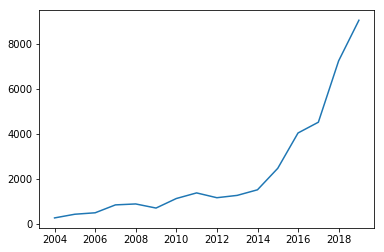

In [226]:
from matplotlib import pyplot as plt
plt.plot(closed_on, closed_at.Close)

In [5]:
turnover_series = df2.resample('Y', on = 'Date')['Turnover (Lacs)'].mean().reset_index()
turnover_series.rename(columns={'Turnover (Lacs)':'turnover'},inplace=True)
turnover_series.head()
# plt.plot(turnover_series.Date, turnover_series['Turnover (Lacs)'])

,Date,turnover
0,2003-12-31,11707.923226
1,2004-12-31,23431.581339
2,2005-12-31,7810.894900
3,2006-12-31,10460.960760
4,2007-12-31,6520.199438


In [6]:
turnover_series.dtypes

Date        datetime64[ns]
turnover           float64
dtype: object

In [7]:
turnover_train_x = np.array(turnover_series.Date).reshape((16,1))
turnover_train_y = np.array(turnover_series['turnover']).reshape((16,1))
# regr = linear_model.LinearRegression()
# regr.fit(turnover_train_x, turnover_train_y)
# turnover_2019_pred = regr.predict([['2003-12-31T00:00:00.000000000']])
# plt.plot(turnover_series.Date, turnover_series['Turnover (Lacs)'])
# turnover_train_x

In [8]:
df2['Turnover (Lacs)'].describe()

count      3762.000000
mean      15263.560869
std       17206.721843
min         213.150000
25%        5742.352500
50%        9249.970000
75%       19330.517500
max      487899.240000
Name: Turnover (Lacs), dtype: float64

In [9]:
turnover_series.turnover.describe()

count       16.000000
mean     15816.755035
std      11991.237979
min       5471.160405
25%       7773.007465
50%      10462.339540
75%      21099.418349
max      44602.371076
Name: turnover, dtype: float64

{'boxes': [<matplotlib.lines.Line2D at 0x200f2cd0b70>],
 'caps': [<matplotlib.lines.Line2D at 0x200f2cdf6a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x200f2cef390>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x200f2cdfef0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x200f2cd0cf8>,
  <matplotlib.lines.Line2D at 0x200f2cdf278>]}

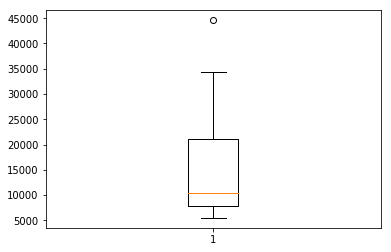

In [10]:
plt.boxplot(turnover_series['turnover'])

In [15]:
# turnover

In [ ]:
from pandas.plotting import lag_plot
lag_plot(turnover_series.turnover)

## Now we will take more data as this data is very less

In [16]:
df2['Turnover (Lacs)'].describe()

count      3762.000000
mean      15263.560869
std       17206.721843
min         213.150000
25%        5742.352500
50%        9249.970000
75%       19330.517500
max      487899.240000
Name: Turnover (Lacs), dtype: float64

In [17]:
turnover_train_x = df2['Turnover (Lacs)']
# plt.boxplot(df2)
turnover_train_x.head()

0    44002.98
1    42757.42
2    31355.62
3    31750.75
4    39190.31
Name: Turnover (Lacs), dtype: float64

{'boxes': [<matplotlib.lines.Line2D at 0x200f30cd400>],
 'caps': [<matplotlib.lines.Line2D at 0x200f30cdf28>,
 'fliers': [<matplotlib.lines.Line2D at 0x200f30d4c18>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x200f30d47b8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x200f30cd588>,
  <matplotlib.lines.Line2D at 0x200f30cdac8>]}

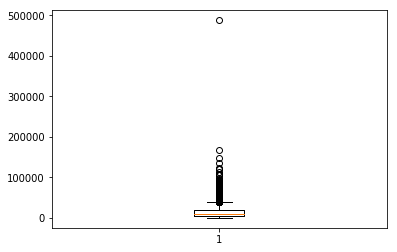

In [18]:
plt.boxplot(turnover_train_x)

In [19]:
outlier_index = turnover_train_x[turnover_train_x == turnover_train_x.max()].index
turnover_train_x.drop(index = outlier_index, inplace=True)

In [20]:
turnover_train_x.max()

167087.70999999999

{'boxes': [<matplotlib.lines.Line2D at 0x200f3126a90>],
 'caps': [<matplotlib.lines.Line2D at 0x200f312e5f8>,
 'fliers': [<matplotlib.lines.Line2D at 0x200f3136358>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x200f312eeb8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x200f3126c18>,
  <matplotlib.lines.Line2D at 0x200f312e198>]}

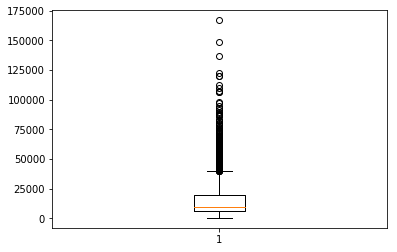

In [21]:
plt.boxplot(turnover_train_x)

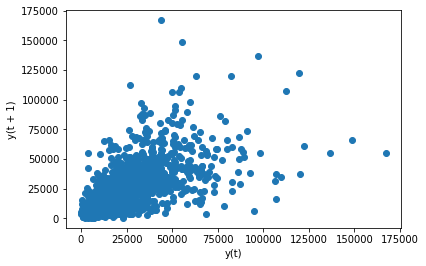

In [22]:
from pandas.plotting import lag_plot
lag_plot(turnover_train_x)

In [23]:
values = pd.DataFrame(turnover_train_x.values)
df_consequtive_values = pd.concat([values.shift(1), values], axis=1)
df_consequtive_values.columns = ['t+1', 't']
df_consequtive_values.corr()

,t+1,t
t+1,1.000000,0.741275
t,0.741275,1.000000


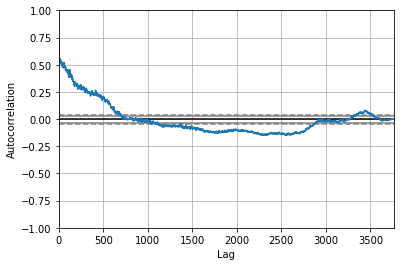

In [27]:
%matplotlib inline
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(turnover_train_x)

### The horizontal axis of an autocorrelation plot
### shows the size of the lag between the elements of the time series.
### For example, the autocorrelation with lag 2 is the correlation between the time series
### elements and the corresponding elements that were observed two time periods earlier

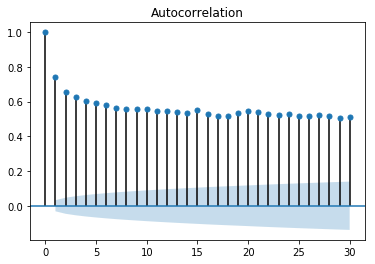

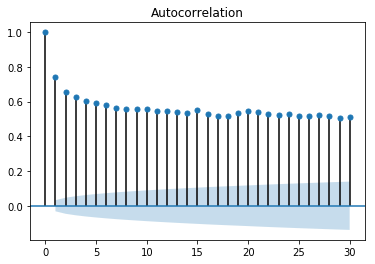

In [30]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(turnover_train_x, lags=30)

In [33]:
t

Date        2018-12-31 00:00:00
turnover                44602.4
dtype: object